In [72]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st
from scipy.stats import linregress
from alpha_api_key import api_key
from datetime import datetime



def lin_reg(x, y, annotate):
    (slope,intercept,rvalue,pvalue,stderror) = linregress(x,y)
    reg_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    plt.plot(x, reg_values, color='r')
    plt.annotate(line_eq, annotate, fontsize=15, color='r')

In [36]:
# Create our stock csv files by pulling from Alpha Advantage API
ticker = ["ABBV", "BMY", "CTLT", "LLY", "JNJ", "MRK", "OGN", "PFE", "VTRS", "ZTS" ]

for i in ticker:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=" + i + \
    "&apikey=" + api_key + "&datatype=csv"
    print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=ABBV&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BMY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=CTLT&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=LLY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=JNJ&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MRK&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=OGN&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=PFE&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=VTRS&apikey=QJ3L29WRI4F95OII&datatype=cs

In [37]:
# Import csv files and merge into one data frame
abbv_stock = "csv_files/monthly_ABBV.csv"
bmy_stock = "csv_files/monthly_BMY.csv"
ctlt_stock = "csv_files/monthly_CTLT.csv"
lly_stock = "csv_files/monthly_LLY.csv"
jnj_stock = "csv_files/monthly_JNJ.csv"
mrk_stock = "csv_files/monthly_MRK.csv"
ogn_stock = "csv_files/monthly_OGN.csv"
pfe_stock = "csv_files/monthly_PFE.csv"
vtrs_stock = "csv_files/monthly_VTRS.csv"
zts_stock = "csv_files/monthly_ZTS.csv"

abbv_df = pd.read_csv(abbv_stock).sort_values(by=['timestamp']).reset_index(drop=True)
bmy_df = pd.read_csv(bmy_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ctlt_df = pd.read_csv(ctlt_stock).sort_values(by=['timestamp']).reset_index(drop=True)
lly_df = pd.read_csv(lly_stock).sort_values(by=['timestamp']).reset_index(drop=True)
jnj_df = pd.read_csv(jnj_stock).sort_values(by=['timestamp']).reset_index(drop=True)
mrk_df = pd.read_csv(mrk_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ogn_df = pd.read_csv(ogn_stock).sort_values(by=['timestamp']).reset_index(drop=True)
pfe_df = pd.read_csv(pfe_stock).sort_values(by=['timestamp']).reset_index(drop=True)
vtrs_df = pd.read_csv(vtrs_stock).sort_values(by=['timestamp']).reset_index(drop=True)
zts_df = pd.read_csv(zts_stock).sort_values(by=['timestamp']).reset_index(drop=True)

merge_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
            abbv_df, bmy_df, how='outer'), ctlt_df, how='outer'), lly_df, how='outer'), \
            jnj_df, how='outer'), mrk_df, how='outer'), ogn_df, how='outer'), \
            pfe_df, how='outer'), vtrs_df, how='outer'), zts_df, how='outer')

# Format timestamp column so they are all the same
merge_df['timestamp'] = pd.to_datetime(merge_df['timestamp'], format='mixed')

# Save merged data frame to new csv
merge_df.to_csv('csv_files/merge_stock.csv', index=False)

# New dataframe for graphing
graph_df = merge_df.copy()

# Convert dates to number for regression lines
graph_df['timestamp']= graph_df['timestamp'].apply(mdates.date2num)
graph_df['timestamp'] = graph_df['timestamp'].astype(float)

In [52]:
#Fixes line graphs, not sure why
merge_df.sort_values(by = 'timestamp', inplace = True)

In [53]:
# Check counts
merge_df.count()

ticker       1867
timestamp    1867
open         1867
high         1867
low          1867
close        1867
volume       1867
dtype: int64

In [54]:
merge_df

,ticker,timestamp,open,high,low,close,volume
908,JNJ,1999-12-31,103.30,103.400,90.13,93.25,71283600
527,LLY,1999-12-31,71.13,73.880,63.63,66.50,52936700
129,BMY,1999-12-31,72.63,74.560,59.94,64.19,91559200
1511,PFE,1999-12-31,36.13,36.500,32.19,32.44,256858000
1195,MRK,1999-12-31,77.75,78.130,66.06,67.19,110562800
...,...,...,...,...,...,...,...
838,JNJ,2023-10-16,155.42,159.270,153.32,157.53,63914874
526,CTLT,2023-10-16,45.20,47.795,42.20,46.52,20089454
1125,MRK,2023-10-16,102.83,105.370,100.92,104.14,67907278
1707,VTRS,2023-10-16,10.29,10.370,9.27,9.47,113735863


In [55]:
graph_df

,ticker,timestamp,open,high,low,close,volume
0,ABBV,15764.0,36.84,39.13,35.0100,36.92,151690500
1,ABBV,15792.0,36.80,40.80,36.5510,40.78,122236200
2,ABBV,15825.0,39.96,46.32,39.9600,46.05,176083000
3,ABBV,15856.0,45.74,48.00,42.6825,42.69,119566400
4,ABBV,15884.0,42.88,44.47,40.1000,41.34,107872600
...,...,...,...,...,...,...,...
1862,ZTS,17074.0,51.15,52.17,50.0700,52.01,74984818
1863,ZTS,18169.0,126.13,130.08,119.5200,124.59,42499438
1864,ZTS,18535.0,160.71,166.79,152.5028,165.37,32363345
1865,ZTS,18900.0,204.56,210.10,191.3300,194.14,31838084


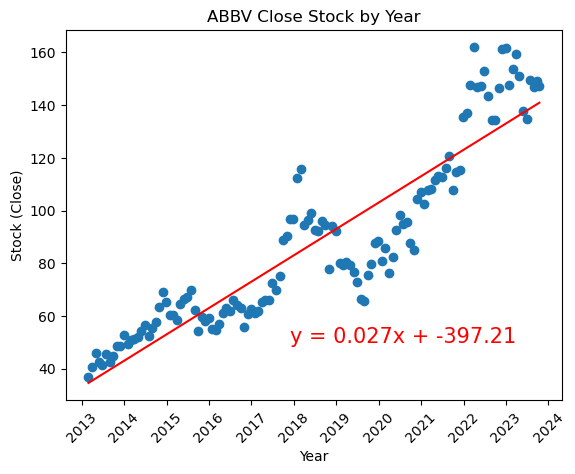

In [56]:
# Graph ABBV
abbv_df = graph_df.loc[graph_df['ticker'] == 'ABBV']
x = abbv_df['timestamp']
y = abbv_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('ABBV Close Stock by Year')
annotate = (17500.0, 50)

lin_reg(x, y, annotate)
plt.savefig("graphs/ABBV_graph.png")
plt.show()

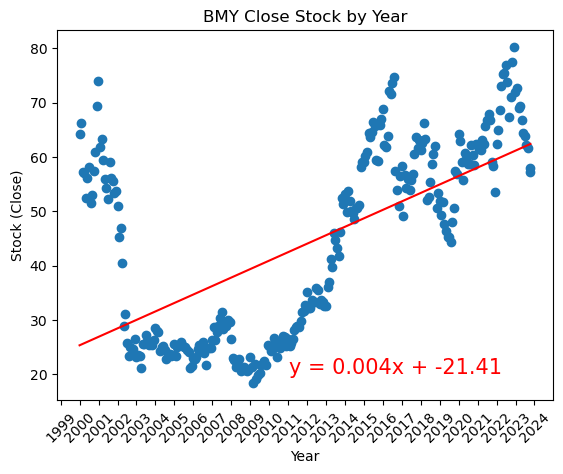

In [57]:
# Graph BMY
bmy_df = graph_df.loc[graph_df['ticker'] == 'BMY']
x = bmy_df['timestamp']
y = bmy_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('BMY Close Stock by Year')
annotate = (15000.0, 20)

lin_reg(x, y, annotate)
plt.savefig("graphs/BMY_graph.png")
plt.show()

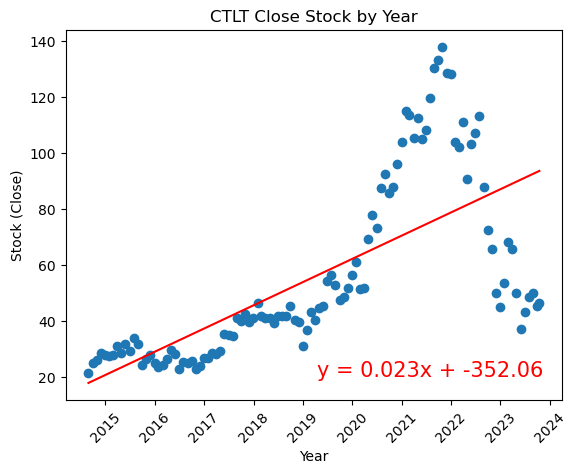

In [58]:
# Graph CTLT
ctlt_df = graph_df.loc[graph_df['ticker'] == 'CTLT']
x = ctlt_df['timestamp']
y = ctlt_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('CTLT Close Stock by Year')
annotate = (18000.0, 20)

lin_reg(x, y, annotate)
plt.savefig("graphs/CTLT_graph.png")
plt.show()

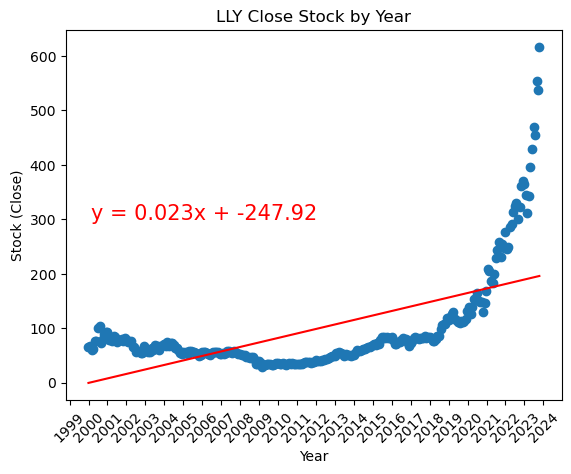

In [59]:
# Graph LLY
lly_df = graph_df.loc[graph_df['ticker'] == 'LLY']
x = lly_df['timestamp']
y = lly_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('LLY Close Stock by Year')
annotate = (11000.0, 300)

lin_reg(x, y, annotate)
plt.savefig("graphs/LLY_graph.png")
plt.show()

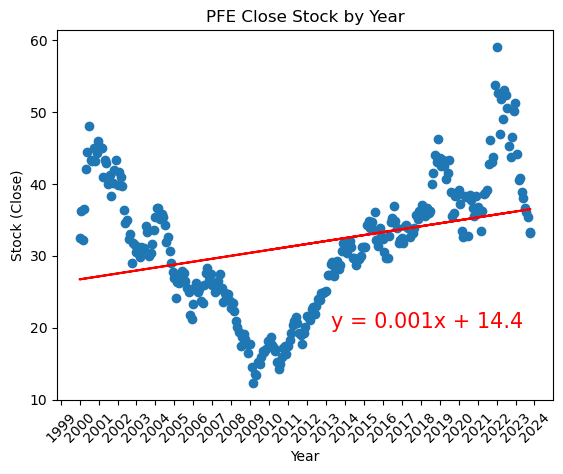

In [60]:
#Graphing PFE

pfe_df = graph_df.loc[graph_df['ticker'] == 'PFE']

x = pfe_df['timestamp']
y = pfe_df['close']

plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('PFE Close Stock by Year')
annotate = (15800.0, 20)

lin_reg(x, y, annotate)
plt.savefig("graphs/PFE_graph.png")
plt.show()

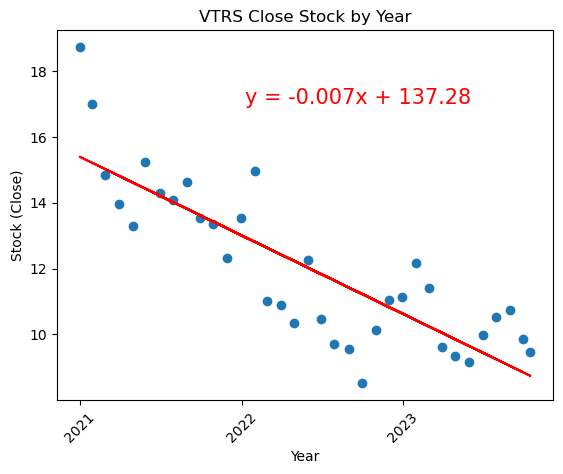

In [61]:
#Graphing VTRS

vtrs_df = graph_df.loc[graph_df['ticker'] == 'VTRS']
x = vtrs_df['timestamp']
y = vtrs_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('VTRS Close Stock by Year')
annotate = (19000.0, 17)

lin_reg(x, y, annotate)
plt.savefig("graphs/VTRS_graph.png")
plt.show()

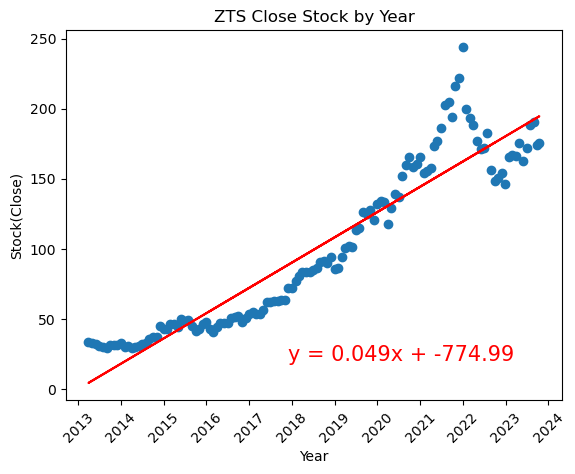

In [62]:
#Graphing ZTS

zts_df_merged = graph_df.loc[graph_df['ticker'] == 'ZTS']

x = zts_df_merged['timestamp']
y = zts_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('ZTS Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (17500.0, 20)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/ZTS_graph.png")

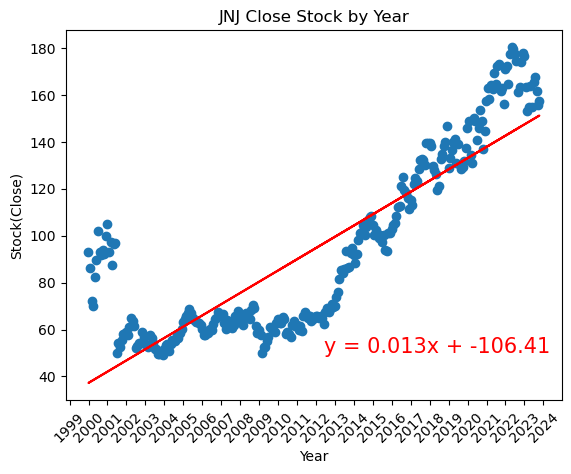

In [63]:
jnj_df_merged = graph_df.loc[graph_df['ticker'] == 'JNJ']

x = jnj_df_merged['timestamp']
y = jnj_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('JNJ Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 50)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/JNJ_graph.png")

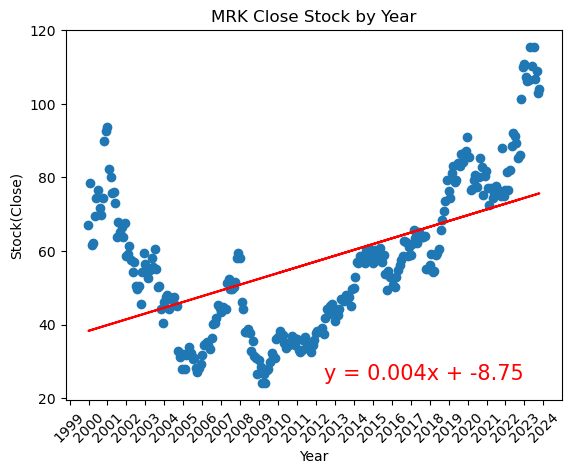

In [64]:
mrk_df_merged = graph_df.loc[graph_df['ticker'] == 'MRK']

x = mrk_df_merged['timestamp']
y = mrk_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('MRK Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 25)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/MRK_graph.png")

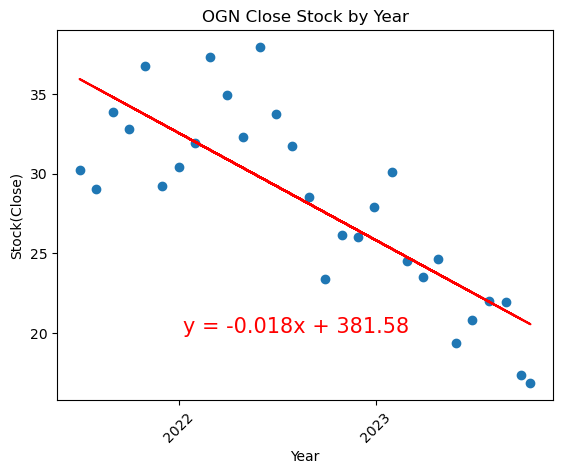

In [65]:
ogn_df_merged = graph_df.loc[graph_df['ticker'] == 'OGN']

x = ogn_df_merged['timestamp']
y = ogn_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('OGN Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (19000, 20)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/OGN_graph.png")

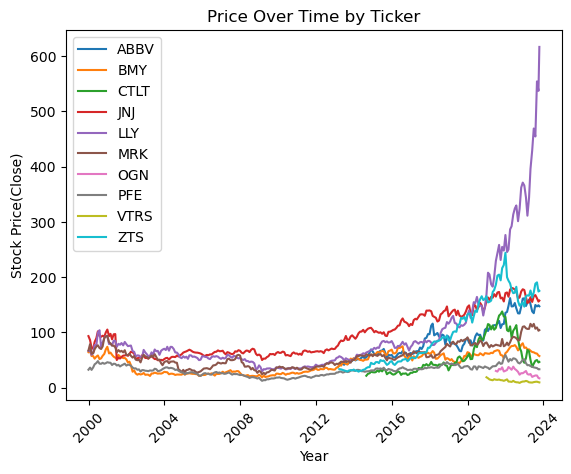

In [66]:
for ticker, group in merge_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraphalltime.png")

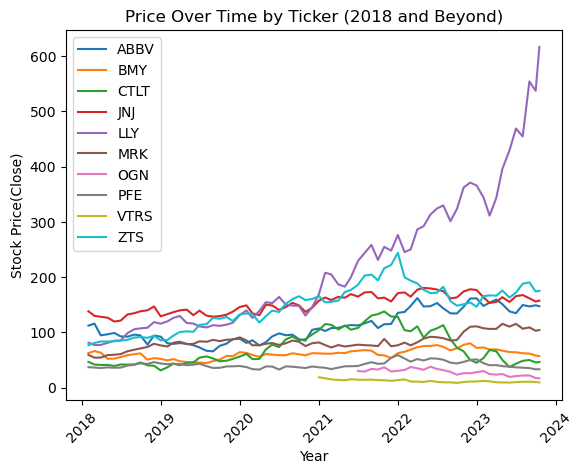

In [67]:
recent_df = merge_df[merge_df['timestamp'].dt.year >= 2018]

for ticker, group in recent_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker (2018 and Beyond)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraph2018andbeyond.png")

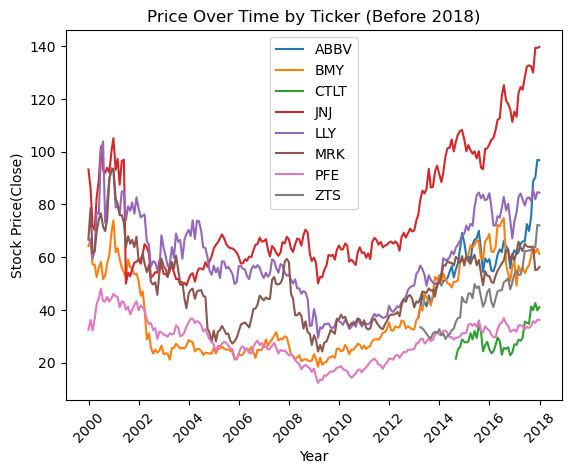

In [68]:
recent_df = merge_df[merge_df['timestamp'].dt.year < 2018]

for ticker, group in recent_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Year')
plt.ylabel('Stock Price(Close)')
plt.title('Price Over Time by Ticker (Before 2018)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraphbefore2018.png")

In [73]:
# Define the date
date_string = "Oct 25 2043"
date = datetime.strptime(date_string, '%b %d %Y')

# Convert the date to a numerical value
num_value = mdates.date2num(date)

print(num_value)

26960.0


In [74]:
num_value = 26960.0

# Convert the numerical value back to a date
date = mdates.num2date(num_value)

print(date)

2043-10-25 00:00:00+00:00
